# 데이터 살펴보기 및 전처리하기

In [1]:
# kaggle titanic의 경우 데이터 분석과 학습을 통한 생존자 예측 -> 회귀
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
train = pd.read_csv('./titanicData/train.csv')
test = pd.read_csv('./titanicData/test.csv')
gender_submission = pd.read_csv('./titanicData/gender_submission.csv')

print(train)
print(test)
print(gender_submission)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
train.info()
test.info()

# train -> Age, Cabin, Embarked null 존재
# test -> Age, Fare, Cabin, Embarked null 존재
# Sex의 경우 카테고리형 데이터이기 때문에 수치형으로 변환시켜야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
## 'Sex' 형변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# train_sex_result = le.fit_transform(train['Sex'])
train['Sex_numeric'] = le.fit_transform(train['Sex'])
# test_sex_result = le.fit_transform(test['Sex'])
test['Sex_numeric'] = le.fit_transform(test['Sex'])

In [5]:
print(train['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [6]:
# null값을 가장 많은 S로 치환해야함
train['Embarked'].fillna('S', inplace=True)

# train_embarked_result = le.fit_transform(train['Embarked'])
train['Embarked_numeric'] = le.fit_transform(train['Embarked'])
# test_embarked_result = le.fit_transform(test['Embarked'])
test['Embarked_numeric'] = le.fit_transform(test['Embarked'])
# embarked 수치형으로 변환

In [7]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
# 나이의 null값은 평균값으로 치환

In [8]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [9]:
mapping_num = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}

train['Cabin_site'] = train['Cabin'].str[:1]
# 맨 앞에가 알파벳이기 때문에 나머지를 빼고 Cabin_site에 저장
print(train['Cabin_site'].value_counts())
train['Cabin_site'] = train['Cabin_site'].map(mapping_num)
# 맵핑 넘버로 치환

Cabin_site
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64


In [10]:
train['Cabin_site'] = train.groupby('Pclass')['Cabin_site'].transform('median')
print(train['Cabin_site'].value_counts())

Cabin_site
5.0    491
2.0    216
4.5    184
Name: count, dtype: int64


In [11]:
test['Cabin_site'] = test['Cabin'].str[:1]
# 맨 앞에가 알파벳이기 때문에 나머지를 빼고 Cabin_site에 저장
print(test['Cabin_site'].value_counts())
test['Cabin_site'] = test['Cabin_site'].map(mapping_num)
# 맵핑 넘버로 치환

Cabin_site
C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: count, dtype: int64


In [12]:
test['Cabin_site'] = test.groupby('Pclass')['Cabin_site'].transform('median')
print(test['Cabin_site'].value_counts())

Cabin_site
5.0    311
2.0    107
Name: count, dtype: int64


In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_numeric,Embarked_numeric,Cabin_site
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,5.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,5.0


In [14]:
train_input = train[['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric', 'Cabin_site']].to_numpy()
train_target = train['Survived'].to_numpy()
test_input = test[['Pclass', 'Sex_numeric', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_numeric', 'Cabin_site']].to_numpy()

print(train_input)
print(train_target)

[[ 3.      1.     22.     ...  7.25    2.      5.    ]
 [ 1.      0.     38.     ... 71.2833  0.      2.    ]
 [ 3.      0.     26.     ...  7.925   2.      5.    ]
 ...
 [ 3.      0.     28.     ... 23.45    2.      5.    ]
 [ 1.      1.     26.     ... 30.      0.      2.    ]
 [ 3.      1.     32.     ...  7.75    1.      5.    ]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1

In [15]:
# 훈련세트의 과적합을 피하기 위해 훈련세트와 검증세트로 나눠줌
from sklearn.model_selection import train_test_split

sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)

(712, 8) (179, 8)


# 알고리즘 선택

In [16]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(sub_input)
sub_scaled = ss.transform(sub_input)
val_scaled = ss.transform(val_input)

## KNN

생존자 예측을 하기 위해서 분류알고리즘을 이용하여 최적의 알고리즘을 선별
</br>그 후 회귀를 이용하여 예측

In [17]:
# K-최근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(sub_scaled, sub_target)

print(kn.score(sub_scaled, sub_target))
print(kn.score(val_scaled, val_target))
# 과소적합 발생

0.8693820224719101
0.7821229050279329


## 다중 회귀

In [18]:
# 다중 회귀
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(sub_input)
sub_poly = poly.transform(sub_input)
print(sub_poly.shape)
# 변환기를 이용한 특성 생성

(712, 164)


In [19]:
val_poly = poly.transform(val_input)
# 검증세트에 특성 적용

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(sub_poly, sub_target)

print(lr.score(sub_poly, sub_target))
print(lr.score(val_poly, val_target))

0.5675722868809517
0.28767477836325583


## 릿지 회귀

In [21]:
ss.fit(sub_poly)
sub_poly_scaled = ss.transform(sub_poly)
val_poly_scaled = ss.transform(val_poly)

In [22]:
# 다중회귀에서 훈련 세트에 너무 과적합되었기 때문에 규제필요
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(sub_poly_scaled, sub_target)

print(ridge.score(sub_poly_scaled, sub_target))
print(ridge.score(val_poly_scaled, val_target))
# 과대적합 발생

0.5345460693722296
0.4133312947336396


In [23]:
# alpha 값을 찾기 위한 그래프 출력
sub_ridge_score = []
val_ridge_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(sub_poly_scaled, sub_target)
    
    sub_ridge_score.append(ridge.score(sub_poly_scaled, sub_target))
    val_ridge_score.append(ridge.score(val_poly_scaled, val_target))

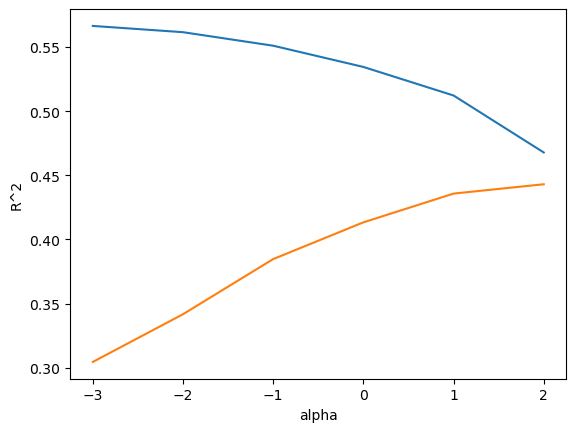

In [24]:
plt.plot(np.log10(alpha_list), sub_ridge_score)
plt.plot(np.log10(alpha_list), val_ridge_score)

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

In [25]:
# alpha값이 작을 수록 과대적합, 클 수록 과소적합
ridge = Ridge(alpha=10)
ridge.fit(sub_poly_scaled, sub_target)

print(ridge.score(sub_poly_scaled, sub_target))
print(ridge.score(val_poly_scaled, val_target))
# 최적의 alpha를 찾았음에도 기본적으로 과소적합이 발생

0.5122712264502428
0.4357672891861726


## 라쏘 회귀

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(sub_poly_scaled, sub_target)

print(lasso.score(sub_poly_scaled, sub_target))
print(lasso.score(val_poly_scaled, val_target))

0.0
-0.005646334288551325


In [27]:
# alpha 값을 찾기 위한 그래프 출력
sub_lasso_score = []
val_lasso_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(sub_poly_scaled, sub_target)
    
    sub_lasso_score.append(lasso.score(sub_poly_scaled, sub_target))
    val_lasso_score.append(lasso.score(val_poly_scaled, val_target))

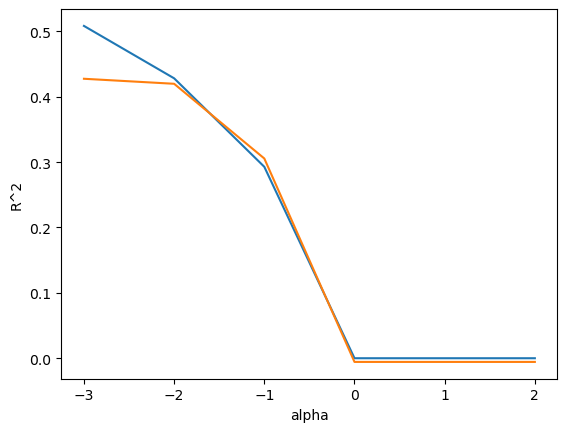

In [28]:
plt.plot(np.log10(alpha_list), sub_lasso_score)
plt.plot(np.log10(alpha_list), val_lasso_score)

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

In [29]:
lasso = Lasso(alpha=0.001, max_iter=10000)
lasso.fit(sub_poly_scaled, sub_target)

print(lasso.score(sub_poly_scaled, sub_target))
print(lasso.score(val_poly_scaled, val_target))
# 과소적합이 뜸

0.5083568872973125
0.42751493855157674


## 로지스틱 회귀

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10, max_iter=1000)
lr.fit(sub_scaled, sub_target)

print(lr.score(sub_scaled, sub_target))
print(lr.score(val_scaled, val_target))

0.8089887640449438
0.7988826815642458


## SGD

In [31]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=100, random_state=42)
sc.fit(sub_scaled, sub_target)

print(sc.score(sub_scaled, sub_target))
print(sc.score(val_scaled, val_target))

0.7570224719101124
0.770949720670391


In [32]:
sub_sc_score = []
val_sc_score = []

classes = np.unique(sub_target)

In [33]:
for _ in range(0, 10000):
    sc.partial_fit(sub_scaled, sub_target, classes=classes)
    sub_sc_score.append(sc.score(sub_scaled, sub_target))
    val_sc_score.append(sc.score(val_scaled, val_target))

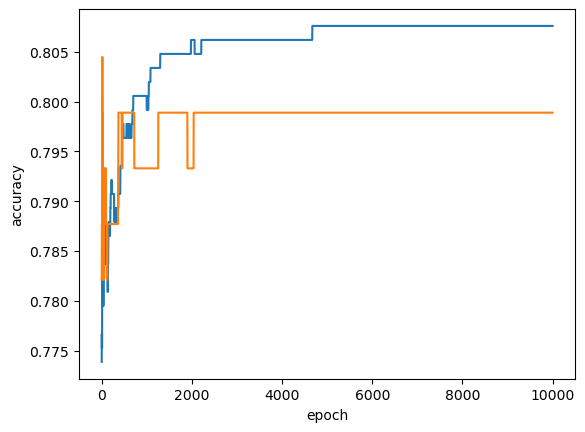

In [34]:
plt.plot(sub_sc_score)
plt.plot(val_sc_score)

plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [35]:
sc = SGDClassifier(loss='log_loss', max_iter=3000, tol=None, random_state=42)
sc.fit(sub_scaled, sub_target)

print(sc.score(sub_scaled, sub_target))
print(sc.score(val_scaled, val_target))

0.8075842696629213
0.7988826815642458


## RandomForest

In [36]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=1, random_state=42)
scores = cross_validate(rf, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 과대적합이 보임

0.9820929300403911 0.7865655471289275


## ExtraTree

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9820929300403911 0.7781246922091993


## 그레이디언트 부스팅

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 과대적합이 조금 해소되었음, 아직 남아있긴 하다.

0.906951561681004 0.8145572737122032


In [39]:
# 결정 트리 개수 최적 매개변수 찾기
sub_gb_score = []
val_gb_score = []

for ne in range(1, 100):
    gb = GradientBoostingClassifier(n_estimators=ne, learning_rate=0.2, random_state=42)
    scores = cross_validate(gb, sub_input, sub_target, return_train_score=True, n_jobs=-1)
    
    sub_gb_score.append(np.mean(scores['train_score']))
    val_gb_score.append(np.mean(scores['test_score']))

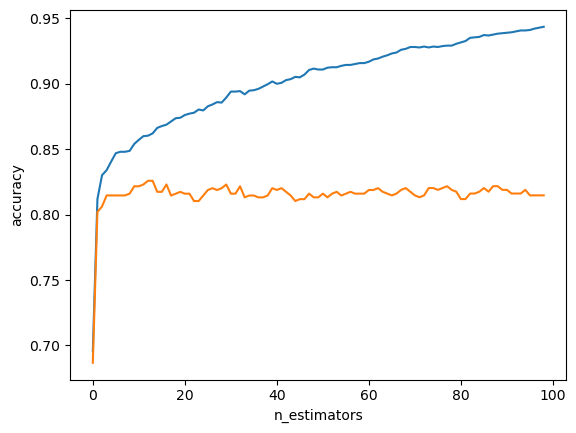

In [40]:
plt.plot(sub_gb_score)
plt.plot(val_gb_score)

plt.xlabel('n_estimators')
plt.ylabel('accuracy')

plt.show()

In [41]:
gb = GradientBoostingClassifier(n_estimators=40, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9016853205068912 0.8201812272234807


## 히스토그램 기반 그레이디언트 부스팅

In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, sub_input, sub_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 과대적합이 보임

0.9715598310362902 0.8033980104402639


# 예측

In [48]:
# 그레이디언트 부스팅이 가장 적합한 알고리즘으로 보였기 때문에 그것을 이용하여 생존자, 사망자 예측에 대입
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=40, learning_rate=0.2, random_state=42)
gbr.fit(sub_input, sub_target)

# 이진 분류 예측을 위해 0.5를 임계값으로 설정
threshold = 0.5

# 예측한 값이 0.5 이상인 경우 1로, 미만인 경우 0으로 변경
gender_submission['Survived'] = [1 if pred >= threshold else 0 for pred in gender_submission['Survived']]
gender_submission.to_csv('titanic-submission.csv', index=False)